In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, stats
import statsmodels.formula.api as smf
import warnings

# Filter out the specific warning
warnings.filterwarnings('ignore', message="A value is trying to be set on a copy of a slice from a DataFrame.")
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [86]:
df = pd.read_excel('E-Commerce data.xlsx')
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51290 non-null  object        
 1   Order Date        51290 non-null  datetime64[ns]
 2   Ship Date         51290 non-null  datetime64[ns]
 3   Aging             51290 non-null  int64         
 4   Ship Mode         51290 non-null  object        
 5   Product Category  51290 non-null  object        
 6   Product           51290 non-null  object        
 7   Sales             51290 non-null  int64         
 8   Quantity          51290 non-null  int64         
 9   Discount          51290 non-null  float64       
 10  Profit            51290 non-null  float64       
 11  Shipping Cost     51290 non-null  float64       
 12  Order Priority    51290 non-null  object        
 13  Customer ID       51290 non-null  object        
 14  Customer Name     5129

In [88]:
df.duplicated(subset=['Order ID']).any()

False

# Profitablity Optimization
untuk mengetahui optimasi dari profit (keuntungan dalam satuan dollar) maka fitur-fitur yang berpotensi yang memiliki pengaruh terhadap profit yaitu diantaranya.
1. Product Category: Perbedaan Category kemungkinan memiliki variasi margin keuntungan.<n>
2. Discount: Penawaran diskon setiap product dapat langsung mempengaruhi keuntungan.<n>
3. Shipping Cost: Variable ini mungkin saja mempengaruhi total biaya pesanan. Memahami dampaknya terhadap profitablitas sangatlah penting, karena biaya pengiriman yang lebih tinggi dapat mengurangi keuntungan <n>
4.  Order Priority: Prioritas order memiliki tingkatan seperti low, medium, high, critical. Semakin tinggi prioritas dalam pesanan mungkin akan dikenakan tambahan harga tapi dapat juga mendapatkan hasil di penjualan yang akan berdampak ke keuntungan. Prioritas order memiliki tingkatan <n>
5.  Aging: umur dari ketika customer pesan sampai mengirim pesanan<n>
6.  Quantity: Kuantitas yang terjual
7.  Region: lokasi geografis dengan kategori
   - Central
   - South
   - Europe, Middle East, and Africa (EMEA)
   - North
   - Ocenia
   - West
   - East    
   - Southeast Asia
   - Central Asia
   - North Asia
   - Caribean
   - Canada
8. Segment: Perbedaan Segmen pelanggan dengan kategori.
   - Consumer
   - Coorporate
   - Home Office

In [89]:
data = df[['Profit','Product Category','Discount','Shipping Cost', 'Order Priority', 'Aging', 'Quantity', 'Region', 'Segment']]
data.rename(columns = {'Product Category': 'Product_Category', 'Shipping Cost':'Shipping_Cost','Order Priority':'Order_Priority'}, inplace=True)
data.head()

,Profit,Product_Category,Discount,Shipping_Cost,Order_Priority,Aging,Quantity,Region,Segment
0,46.00,Auto & Accessories,0.05,4.600,Medium,8,2,Oceania,Consumer
1,112.01,Auto & Accessories,0.03,11.201,Medium,2,3,Central,Home Office
2,31.15,Auto & Accessories,0.01,3.115,Critical,8,5,Oceania,Consumer
3,26.20,Auto & Accessories,0.05,2.620,High,7,2,Central Asia,Corporate
4,160.00,Auto & Accessories,0.04,16.000,Critical,9,1,Oceania,Corporate


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profit            51290 non-null  float64
 1   Product_Category  51290 non-null  object 
 2   Discount          51290 non-null  float64
 3   Shipping_Cost     51290 non-null  float64
 4   Order_Priority    51290 non-null  object 
 5   Aging             51290 non-null  int64  
 6   Quantity          51290 non-null  int64  
 7   Region            51290 non-null  object 
 8   Segment           51290 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.5+ MB


In [91]:
data.describe()

,Profit,Discount,Shipping_Cost,Aging,Quantity
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,72.721836,0.029971,7.272184,5.255040,2.997309
std,49.099328,0.014114,4.909933,2.959905,1.413453
min,0.510000,0.010000,0.051000,1.000000,1.000000
25%,25.730000,0.020000,2.573000,3.000000,2.000000
50%,67.000000,0.030000,6.700000,5.000000,3.000000
75%,120.560000,0.040000,12.056000,8.000000,4.000000
max,167.500000,0.050000,16.750000,10.000000,5.000000


In [92]:
data.isnull().any()

Profit              False
Product_Category    False
Discount            False
Shipping_Cost       False
Order_Priority      False
Aging               False
Quantity            False
Region              False
Segment             False
dtype: bool

In [93]:
def splitNumCat(data):
    list_num = [var for var in data.columns if data[var].dtype != 'O']
    list_object = [var for var in data.columns if data[var].dtype == 'O']
    return list_num, list_object
list_num, list_object = splitNumCat(data)

In [94]:
list_numeric_only = [item for item in list_num if item not in  ['Discount', 'Quantity']]
list_numeric_only

['Profit', 'Shipping_Cost', 'Aging']

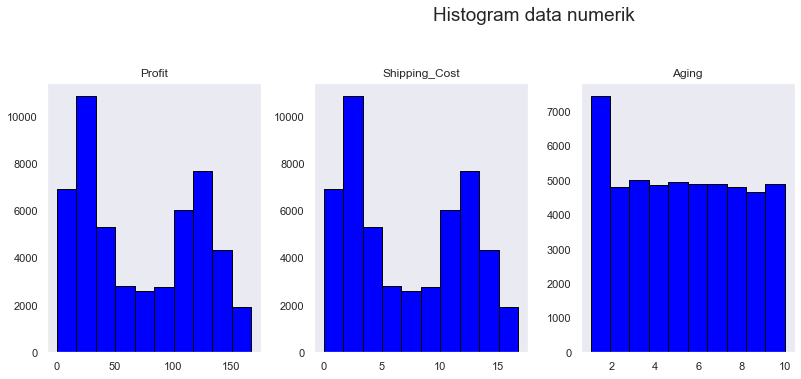

In [95]:
data[list_numeric_only].hist(bins=10,
                    figsize = (15, 5),
                                      layout = (-1, 4),
                                      grid = False,
                                      color = "blue",
                                      edgecolor = "black",
                                      )
plt.suptitle("Histogram data numerik", fontsize=19, y=1.05)
plt.tight_layout()
plt.show()

In [96]:
data['Quantity'].value_counts(normalize=True).sort_values(ascending=False)*100

3    20.095535
1    20.079938
4    20.038994
2    19.906415
5    19.879119
Name: Quantity, dtype: float64

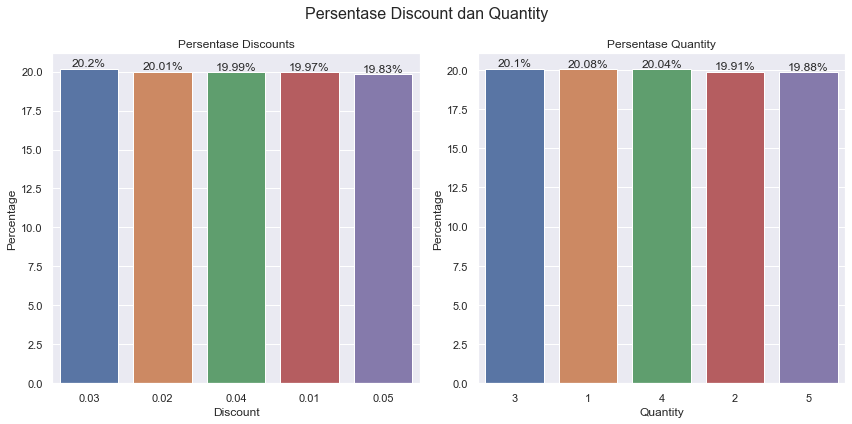

In [97]:
discount_percentage = data['Discount'].value_counts(normalize=True)*100
quantity_percentage = data['Quantity'].value_counts(normalize=True)*100
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=discount_percentage.index, y=discount_percentage.values, ax=axes[0], order=discount_percentage.index)
axes[0].set_title('Persentase Discounts')
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Discount')

for index, value in enumerate(discount_percentage):
    axes[0].text(index, value, str(round(value, 2)) + '%', ha='center', va='bottom')

sns.barplot(x=quantity_percentage.index, y=quantity_percentage.values, ax=axes[1], order=quantity_percentage.index)
axes[1].set_title('Persentase Quantity')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Quantity')

for index, value in enumerate(quantity_percentage):
    axes[1].text(index, value, str(round(value, 2)) + '%', ha='center', va='bottom')

plt.suptitle("Persentase Discount dan Quantity", fontsize=16)
plt.tight_layout()
plt.show()

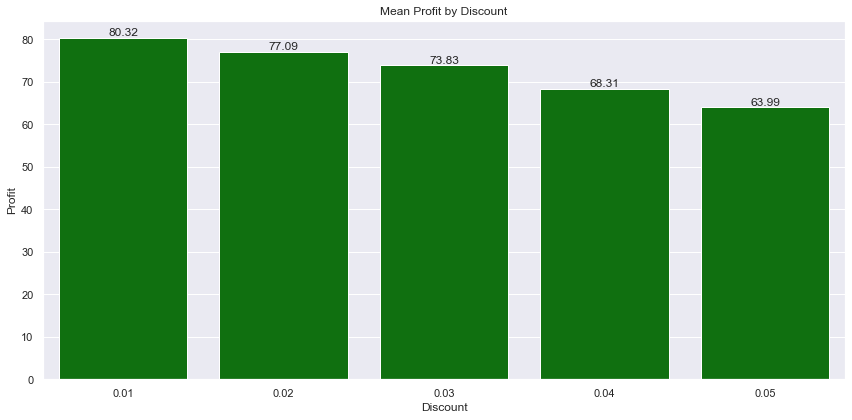

In [98]:
mean_sales = data.groupby(['Discount'])['Profit'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=mean_sales, 
                 x="Discount", 
                 y="Profit",  # Use 'Profit' directly here
                 color="green",
                 order=mean_sales.sort_values('Profit', ascending=False)['Discount'])

ax.set(title='Mean Profit by Discount')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')
plt.tight_layout()
plt.show()

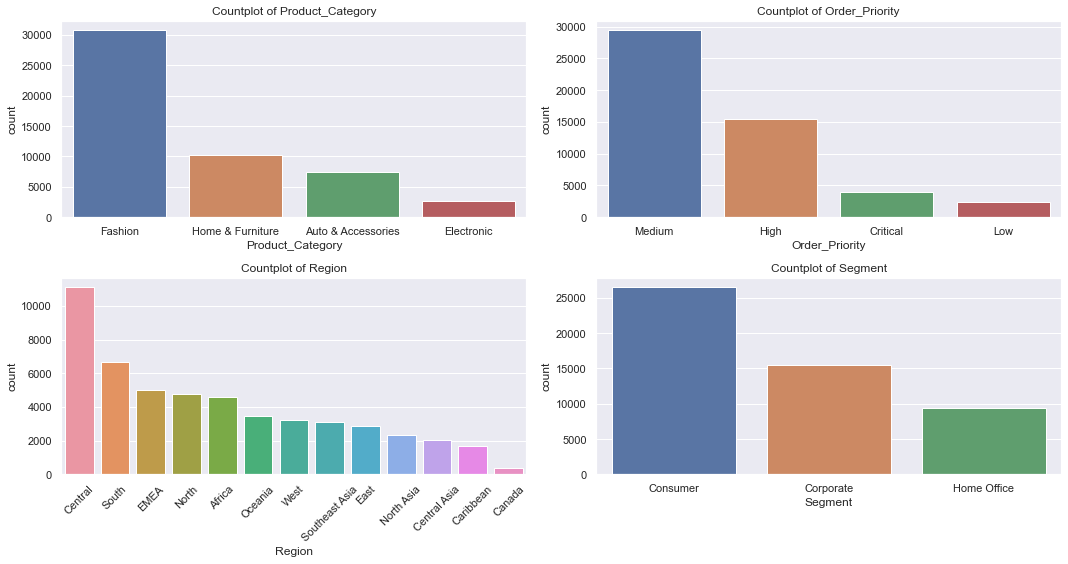

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


for i, column in enumerate(list_object):
    row = i // 2  # Row index in the subplot grid
    col = i % 2   # Column index in the subplot grid
    
    if column == 'Region':
        sns.countplot(x=column, data=data, ax=axes[row, col], order=data[column].value_counts().index)
        axes[row, col].set_title(f'Countplot of {column}')
        axes[row, col].tick_params(axis='x', labelrotation=45)
    else:
        sns.countplot(x=column, data=data, ax=axes[row, col], order=data[column].value_counts().index)
        axes[row, col].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

Variabel Region menunjukkan adanya kategori Region EMEA dan Africa. yang dimana EMEA kepanjangan dari Europe, Middle East, and Africa. alangkah lebih baiknya kategori ini dapat disatukan agar lebih mudah untuk di analysis

In [100]:
data['Region']=data["Region"].replace('Africa', 'EMEA')
data['Region'].value_counts()

Central           11117
EMEA               9616
South              6645
North              4785
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

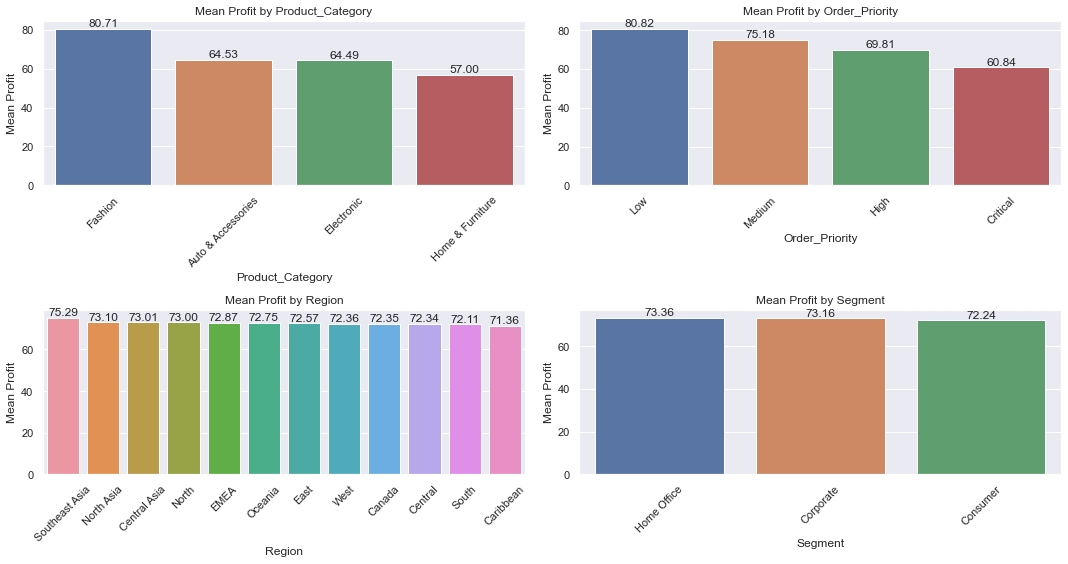

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))


for i, column in enumerate(list_object):
    row = i // 2  # Row index in the subplot grid
    col = i % 2   # Column index in the subplot grid
    
    sns.barplot(x=column, y='Profit', data=data, estimator=np.mean, order=data.groupby(column)['Profit'].mean().sort_values(ascending=False).index, ax=axes[row, col], ci=None)  # Setting ci=None removes error bars
    axes[row, col].set_title(f'Mean Profit by {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Mean Profit')
    axes[row, col].tick_params(axis='x', rotation=45)

    for bar in axes[row, col].patches:
        axes[row, col].annotate(format(bar.get_height(), '.2f'), 
                                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                ha='center', va='center',
                                xytext=(0, 5),
                                textcoords='offset points')

plt.tight_layout()
plt.show()

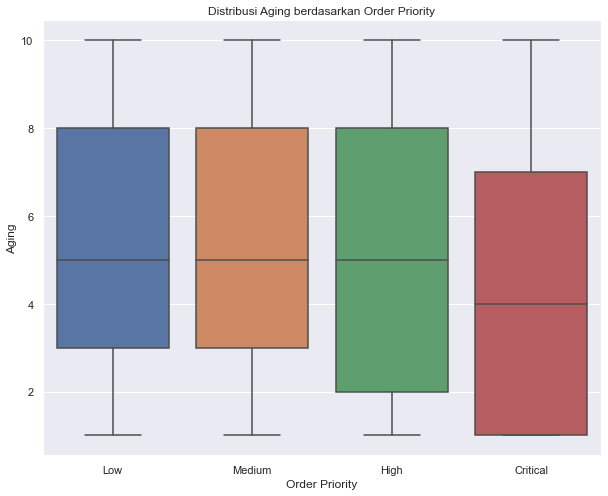

In [102]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, x='Order_Priority', y='Aging', order=["Low", "Medium", "High", "Critical"])
plt.title('Distribusi Aging berdasarkan Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Aging')
plt.show()

Variabel akan di encode secara manual berdasarkan urutan profit yang ada di dalam grafik diatas

In [103]:
data_encode = data.copy()
data_encode.head()

,Profit,Product_Category,Discount,Shipping_Cost,Order_Priority,Aging,Quantity,Region,Segment
0,46.00,Auto & Accessories,0.05,4.600,Medium,8,2,Oceania,Consumer
1,112.01,Auto & Accessories,0.03,11.201,Medium,2,3,Central,Home Office
2,31.15,Auto & Accessories,0.01,3.115,Critical,8,5,Oceania,Consumer
3,26.20,Auto & Accessories,0.05,2.620,High,7,2,Central Asia,Corporate
4,160.00,Auto & Accessories,0.04,16.000,Critical,9,1,Oceania,Corporate


In [104]:
# Definisikan pemetaan nilai
mapping_product_category = {
     'Fashion': 1,
    'Auto & Accessories': 2,
    'Electronic': 3,
    'Home & Furniture': 4
   
}
priority_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Critical': 4
}
region_mapping = {
    'Southeast Asia': 1,
    'North Asia': 2,
    'Central Asia': 3,
    'North': 4,
    'EMEA': 5,
    'Oceania': 6,
    'East': 7,
    'West': 8,
    'Canada': 9,
    'Central': 10,
    'South': 11,
    'Caribbean': 12
}

segment_mapping = {
    'Home Office': 1,
    'Corporate': 2,
    'Consumer': 3
}

In [105]:
data_encode['Product_Category'] = data['Product_Category'].map(mapping_product_category)
data_encode['Order_Priority'] = data_encode['Order_Priority'].map(priority_mapping)
data_encode['Region'] = data_encode['Region'].map(region_mapping)
data_encode['Segment'] = data_encode['Segment'].map(segment_mapping)
data_encode.head()

,Profit,Product_Category,Discount,Shipping_Cost,Order_Priority,Aging,Quantity,Region,Segment
0,46.00,2,0.05,4.600,2,8,2,6,3
1,112.01,2,0.03,11.201,2,2,3,10,1
2,31.15,2,0.01,3.115,4,8,5,6,3
3,26.20,2,0.05,2.620,3,7,2,3,2
4,160.00,2,0.04,16.000,4,9,1,6,2


<AxesSubplot:>

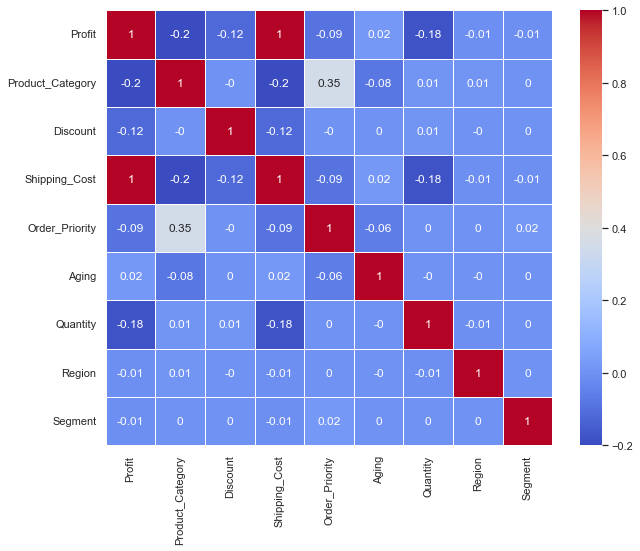

In [106]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(np.round(data_encode.corr(), 2), annot=True, cmap='coolwarm', linewidths=0.5)

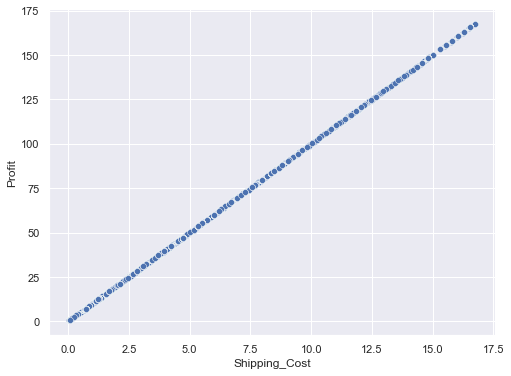

In [107]:
plt.figure(figsize=(8, 6))  # Set the figure size directly here
sns.scatterplot(data=data_encode, x='Shipping_Cost', y='Profit')  # Use scatterplot for individual control
plt.show()

# Statistical Test

In [108]:
data_discount = {
    0.01: data[data['Discount'] == 0.01]['Profit'],
    0.02: data[data['Discount'] == 0.02]['Profit'],
    0.03: data[data['Discount'] == 0.03]['Profit'],
    0.04: data[data['Discount'] == 0.04]['Profit'],
    0.05: data[data['Discount'] == 0.05]['Profit']
}

# Pairs of discount
discount_pairs = [(0.01, 0.02), (0.01, 0.03), (0.01, 0.04), (0.01, 0.05),
                  (0.02, 0.03), (0.02, 0.04), (0.02, 0.05), (0.03, 0.04),
                  (0.03, 0.05), (0.04, 0.05)]

alpha = 0.05

for pair in discount_pairs:
    profits_1 = data_discount[pair[0]]
    profits_2 = data_discount[pair[1]]
    
    t_stat, p_value = ttest_ind(profits_1, profits_2, equal_var=False)
    
    print(f"{pair[0]} vs. {pair[1]}:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    if p_value < alpha:
        print("Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount")
    else:
        print("Terima H0: tidak adanya perbedaan rata-rata profit dengan nilai discount")
    print()

0.01 vs. 0.02:
T-statistic: 4.424133174294786, P-value: 9.733062288699822e-06
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.01 vs. 0.03:
T-statistic: 9.14124550176783, P-value: 6.740132941139562e-20
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.01 vs. 0.04:
T-statistic: 17.14729401903622, P-value: 1.926676511413968e-65
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.01 vs. 0.05:
T-statistic: 23.70089851893637, P-value: 1.793736780481141e-122
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.02 vs. 0.03:
T-statistic: 4.739494734200524, P-value: 2.1568682090390705e-06
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.02 vs. 0.04:
T-statistic: 12.943998954483877, P-value: 3.59431843738481e-38
Tolak H0: adanya perbedaan rata-rata profit dengan nilai discount

0.02 vs. 0.05:
T-statistic: 19.6503639818202, P-value: 3.607002572520463e-85
Tolak H0: adanya perbedaan rata-rata profit dengan n

In [109]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
def conf_interval(col_1, col_2, alpha=0.05):
    cm = CompareMeans(d1=DescrStatsW(data=col_1), d2=DescrStatsW(data=col_2))

    lower, upper = cm.tconfint_diff(alpha=alpha, alternative='two-sided', usevar='unequal')

    return lower, upper

for pair in discount_pairs:
    col_1 = data_discount[pair[0]]
    col_2 = data_discount[pair[1]]

    lower_bound, upper_bound = conf_interval(col_1, col_2)

    print(f"Confidence Interval for {pair[0]} vs. {pair[1]}: ({lower_bound}, {upper_bound})")
    print(f"Kita percaya dengan persentase 95% bahwa perbedaan sebenarnya dalam rata-rata keuntungan diantara diskon \n dari {pair[0]} dengan {pair[1]} berada dalam kisaran sekitar {lower_bound} hingga {upper_bound}")
    print()

Confidence Interval for 0.01 vs. 0.02: (1.7959167367942368, 4.6531121698876525)
Kita percaya dengan persentase 95% bahwa perbedaan sebenarnya dalam rata-rata keuntungan diantara diskon 
 dari 0.01 dengan 0.02 berada dalam kisaran sekitar 1.7959167367942368 hingga 4.6531121698876525

Confidence Interval for 0.01 vs. 0.03: (5.094950762328617, 7.876258733634833)
Kita percaya dengan persentase 95% bahwa perbedaan sebenarnya dalam rata-rata keuntungan diantara diskon 
 dari 0.01 dengan 0.03 berada dalam kisaran sekitar 5.094950762328617 hingga 7.876258733634833

Confidence Interval for 0.01 vs. 0.04: (10.635283731893725, 13.380492041874742)
Kita percaya dengan persentase 95% bahwa perbedaan sebenarnya dalam rata-rata keuntungan diantara diskon 
 dari 0.01 dengan 0.04 berada dalam kisaran sekitar 10.635283731893725 hingga 13.380492041874742

Confidence Interval for 0.01 vs. 0.05: (14.97840351077615, 17.67921564888169)
Kita percaya dengan persentase 95% bahwa perbedaan sebenarnya dalam rata-r

# Permodelan Regresi

In [110]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [111]:
simple_model = smf.ols(formula = 'Profit ~ Discount', data =data_encode)
result = simple_model.fit()
result_ = round(print_coef_std_err(result),2)
result_

,coef,std err
Intercept,85.14,0.51
Discount,-414.36,15.25


$$ \text{Profit}=85.14−414.36_\text{Discount} $$


In [112]:
profit = 85.14 - (414.36*0.01)
profit

80.9964

- Ketika nilai Discount adalah nol, model memprediksi bahwa Profit akan menjadi 85.14 dollar. <br>
- Jika setiap penambahan satu persen discount, maka model memprediski adanya penurunan sebesar 81$ pada profit dengan tetap menjaga variabel lainnya konstan.

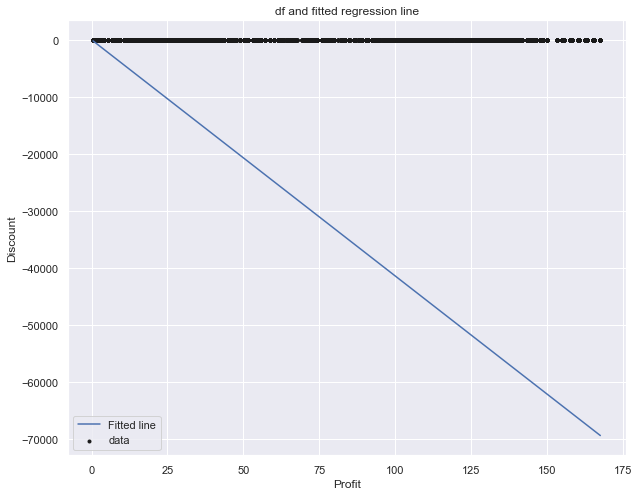

In [113]:
predictor = "Profit"
outcome = "Discount"
df = data_encode.copy()

# Plot the df
plt.scatter(df[predictor], df[outcome], marker=".", label="data", color = "k")

# Calculate the fitted values
a_hat = result_.loc["Intercept"]["coef"]
b_hat = result_.loc[outcome]["coef"]

x_domain = np.linspace(np.min(df[predictor]), np.max(df[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend() 
plt.xlabel(f"{predictor}") 
plt.ylabel(f"{outcome}") 
 
# Add a title and adjust the margins 
plt.title("df and fitted regression line") 
 
# Show the plot 
plt.show() 

terlihat garis regresi jauh dari sebaran data. Ada kemungkinan ada variabel lain yang penting dalam memprediksi profit selain dari discount, yang tidak dimasukkan dalam model.

## Multiple Regresion

In [114]:
model_encode = smf.ols(formula='Profit ~ Product_Category + Discount + Shipping_Cost + Order_Priority + Aging + Quantity + Region + Segment', 
                data=data_encode).fit()
coef_encode_multiple = print_coef_std_err(model_encode)
def ubah_format(nilai):
    return "{:.16f}".format(nilai)
coef_encode_multiple['coef'] = coef_encode_multiple['coef'].apply(ubah_format)
coef_encode_multiple


,coef,std err
Intercept,-0.0000000000030695,5.832434e-14
Product_Category,0.0000000000016271,7.794036e-15
Discount,-0.0000000000009290,6.119099e-13
Shipping_Cost,10.0000000000000071,1.823752e-15
Order_Priority,-0.0000000000000124,1.311789e-14
Aging,-0.0000000000000001,2.906805e-15
Quantity,-0.0000000000000023,6.163856e-15
Region,0.0000000000000000,2.636940e-15
Segment,-0.0000000000000022,1.118957e-14


\begin{align*}
\text{Profit} = & 0.0000000000005544 - 0.0000000000003332_{\text{Product\_Category}} + 0.0000000000004344_{\text{Discount}} \\
& + 10.0000000000000053_{\text{Shipping Cost}} - 0.0000000000000083_{\text{Order\_Priority}} - 0.0000000000000006_{\text{Aging}} \\ 
& - 0.0000000000000071_{\text{Quantity}} + 0.0000000000000030_{\text{Region}} - 0.0000000000000011_{\text{Segment}}
\end{align*}


Jika di proyeksikan untuk melihat keuntungan, dengan contoh sebagai berikut:
- Kategori produk yang di jual adalah kategori __Fashion__ _(1)_
- Diberikan discount sebesar  __0.01__
- Rata-rata Shipping Cost sebesar __7.27__
- Order Priority dengan kategori __Low__ _(1)_
- Memiliki Umur waktu pengiriman barang sampai selama __8 hari__
- Quantity sebanyak __3__
- di bagian __Southest Asia__ _(1)_
- kategori segment __Consumer__ _(3)_

Maka notasi yang ditulis dari proyeksi keuntungan dengan kasus diatas
\begin{align*}
\text{Profit} = & 0.0000000000005544 - 0.0000000000003332_{\text{(1)}} + 0.0000000000004344_{\text{(0.01)}} \\
& + 10.0000000000000053_{\text{(7.27)}} - 0.0000000000000083_{\text{(1)}} - 0.0000000000000006_{\text{(8)}} \\ 
& - 0.0000000000000071_{\text{(3)}} + 0.0000000000000030_{\text{(1)}} - 0.0000000000000011_{\text{(3)}}
\end{align*}

In [115]:
profit = float(coef_encode_multiple.loc['Intercept'][0]) + (float(coef_encode_multiple.loc['Product_Category'][0]) * 1) + (float(coef_encode_multiple.loc['Discount'][0])*0.01) + float(coef_encode_multiple.loc['Shipping_Cost'][0])*7.27 + float(coef_encode_multiple.loc['Order_Priority'][0])*1 + float(coef_encode_multiple.loc['Aging'][0])*8 + float(coef_encode_multiple.loc['Quantity'][0])*3 + float(coef_encode_multiple.loc['Region'][0])*1 + float(coef_encode_multiple.loc['Segment'][0])*3
print(f"Profit yang didapatkan ketika diproyeksikan sebesar {np.round(profit,2)}$")

Profit yang didapatkan ketika diproyeksikan sebesar 72.7$


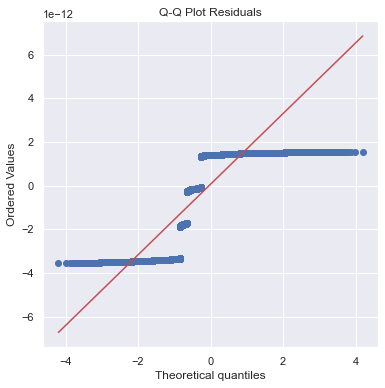

In [116]:
import scipy.stats as stats
residuals = model_encode.resid

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot Residuals')
plt.show()

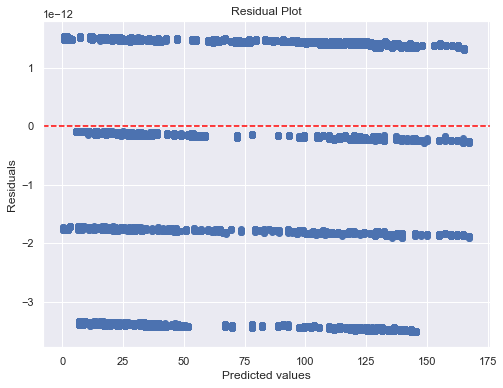

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(model_encode.predict(), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [118]:
print(model_encode.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.102e+30
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:48:39   Log-Likelihood:             1.3104e+06
No. Observations:               51290   AIC:                        -2.621e+06
Df Residuals:                   51281   BIC:                        -2.621e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -3.07e-12   5.83e-14  

Dalam konteks model regresi yang diberikan, R-squared sebesar 1.00 menunjukkan bahwa seluruh variabilitas dari variabel dependen (Profit) dapat dijelaskan oleh variabel independen yang digunakan dalam model tersebut. Ini berarti bahwa model yang digunakan dengan variabel Product Category, Discount, Shipping Cost, Order Priority, Aging, Quantity, Region, dan Segment telah mampu secara sempurna menjelaskan variasi yang ada dalam variabel Profit.

Note:
- Asumsi Normalitas jauh dari kata normal karena sebaran data jauh dari garis model maka dari itu disarakan untuk kedepannya melakukan transformasi data dan asusmsi homoskedasitas juga terlihat adanya heteroskedasitas karena garis referensi nol, ini bisa menandakan bahwa model regresi mungkin tidak memiliki kemampuan untuk menjelaskan variasi dalam data dengan baik. Hal ini bisa disebabkan oleh ketidakkonsistenan atau ketidakcocokan model terhadap data, yang dapat mengakibatkan akurasi prediksi yang rendah.
- Rsq berkisar antara 0 sampai 1 semakin tinggi nilainya maka semakin baik model mampu menjelasikan variasi dari variabel dependen. sedangkan dalam model ini didapatkan sebesar 100%.  Namun, dalam praktiknya, mendapatkan R-squared sebesar 1.00 bisa menjadi indikasi overfitting atau kesesuaian yang terlalu baik terhadap data, yang dapat menimbulkan masalah ketika diterapkan pada data baru atau data yang tidak terlihat sebelumnya. Ini bisa jadi tanda bahwa model terlalu kompleks atau terlalu cocok dengan data dengan sangat baik, tetapi tidak dapat menggeneralisir pola yang ditemukan ke data baru dengan sebaik pada data. Mungkin ini disebabkan asumsi asumsi yang tidak terpenuhi sehingga model yang di generalisir kemungkinan besar tidak valid/reliable.